In [2]:
import pandas as pd
import warnings
import nltk
import pandas as pd
import numpy as np
import nhandv6_text_processing as dvnt
import nhandv6_classification as dvn_c
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate
warnings.filterwarnings("ignore")

url_link = "https://raw.githubusercontent.com/Nhan121/Lectures_notes-teaching-in-VN-/master/US-Embassy_DS-course/Class%203/Datasets/spam.csv"
spam_df = pd.read_csv(url_link)
display(spam_df.head())

data = spam_df.copy()
text_col = 'text'
data['target'] = data['target'].replace({'ham': 0, 'spam': 1})
clf_col = 'target'
max_length = 32
embedding_dim = 32
vocab_size = 1000

vocab_size, max_length, x_train, x_test, y_train, y_test = dvnt.load_word_embedding(data, text_col, clf_col, vocab_size, max_length)

saved_path = 'saved_models/weights.best.CNN.hdf5'
model, history = dvnt.word_embedding_CNN(vocab_size, max_length, x_train, x_test, y_train, y_test, saved_path, 10, 16, 0)
%time model.load_weights(saved_path)

,target,text,discription,key_word,ukn_col
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 128)           128000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)               

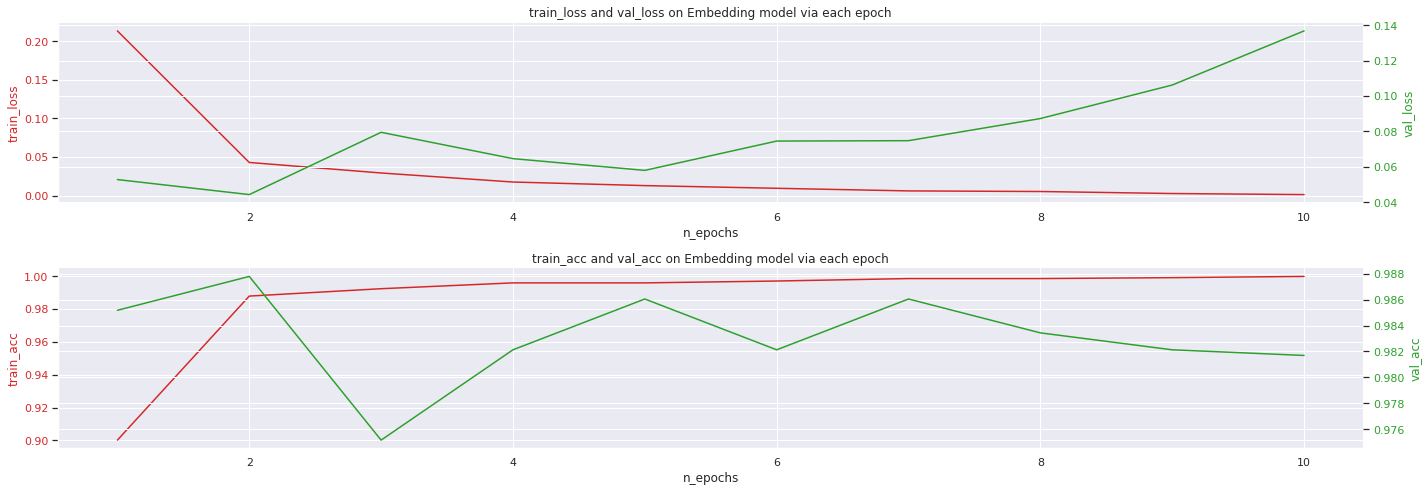

In [3]:
dvnt.WEmbedding_plot(history)

In [4]:
df1 = dvnt.WEmbedding_acc(model, history, x_test, y_test)

              precision    recall  f1-score   support

     no-spam     0.9847    0.9948    0.9897      1355
        spam     0.9924    0.9776    0.9850       939

    accuracy                         0.9878      2294
   macro avg     0.9885    0.9862    0.9873      2294
weighted avg     0.9878    0.9878    0.9878      2294



In [5]:
n_lstm = 5
saved_path2 = 'saved_models/weights.best.LSTM.hdf5'
lstm_model, lstm_history = dvnt.LSTM_model(x_train, y_train, x_test, y_test, n_lstm, vocab_size, max_length, saved_path2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 32, 128)           128000    
_________________________________________________________________
lstm (LSTM)                  (None, 32, 5)             2680      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32, 5)             220       
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 161       
Total params: 131,061
Trainable params: 131,061
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
168/168 - 10s - loss: 0.2240 - acc: 0.9039 - val_loss: 0.0626 - val_acc: 0.9799
Epoch 2/10
168/168

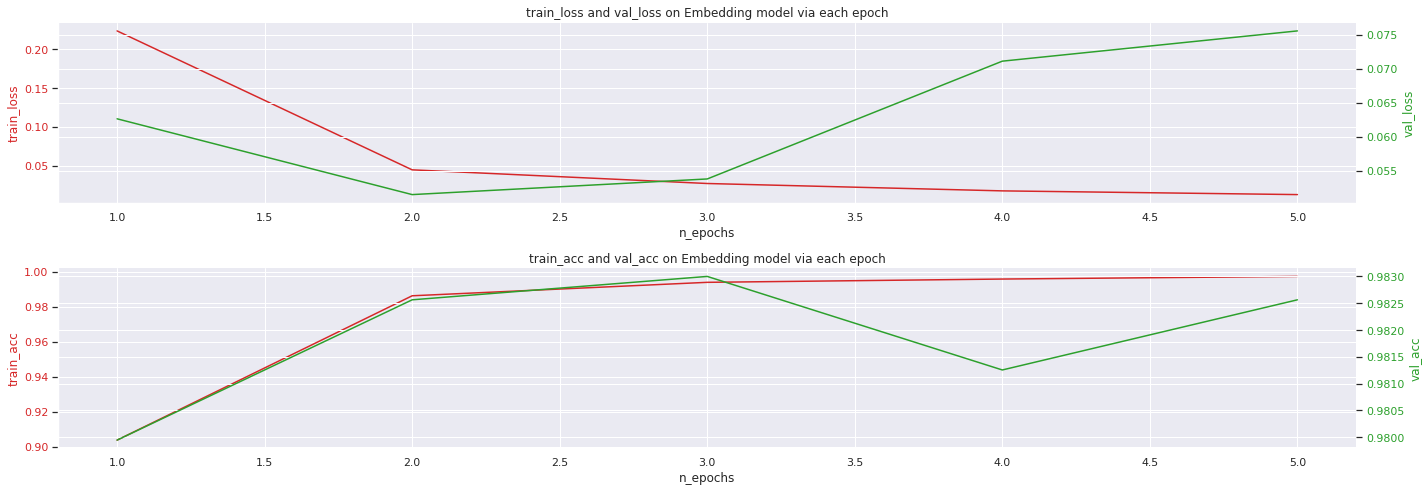

In [6]:
dvnt.WEmbedding_plot(lstm_history)

In [7]:
df2 = dvnt.WEmbedding_acc(lstm_model, lstm_history, x_test, y_test)

              precision    recall  f1-score   support

     no-spam     0.9852    0.9852    0.9852      1355
        spam     0.9787    0.9787    0.9787       939

    accuracy                         0.9826      2294
   macro avg     0.9820    0.9820    0.9820      2294
weighted avg     0.9826    0.9826    0.9826      2294



In [8]:
bi_lstm_model, bi_lstm_history = dvnt.Bi_LSTM(x_train, y_train, x_test, y_test, n_lstm, vocab_size, max_length, saved_path2)

Epoch 1/10
168/168 - 9s - loss: 0.2159 - acc: 0.9017 - val_loss: 0.0568 - val_acc: 0.9847
Epoch 2/10
168/168 - 4s - loss: 0.0396 - acc: 0.9888 - val_loss: 0.0502 - val_acc: 0.9852
Epoch 3/10
168/168 - 4s - loss: 0.0212 - acc: 0.9946 - val_loss: 0.0567 - val_acc: 0.9826
Epoch 4/10
168/168 - 4s - loss: 0.0121 - acc: 0.9961 - val_loss: 0.0575 - val_acc: 0.9847
Epoch 5/10
168/168 - 4s - loss: 0.0054 - acc: 0.9981 - val_loss: 0.0670 - val_acc: 0.9830


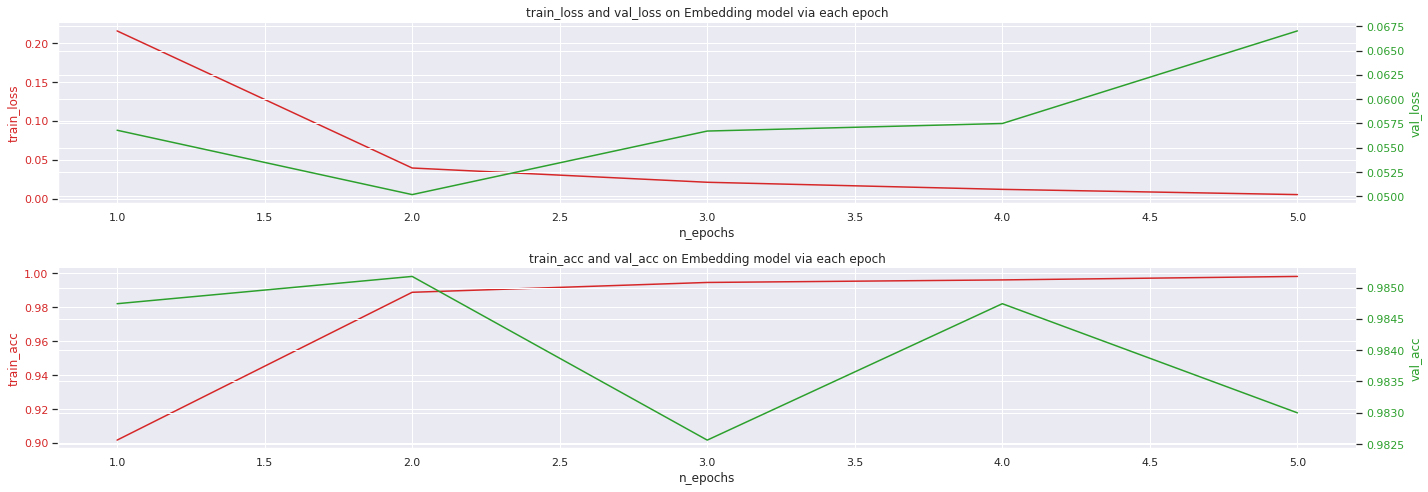

In [9]:
dvnt.WEmbedding_plot(bi_lstm_history)

In [10]:
df3 = dvnt.WEmbedding_acc(bi_lstm_model, lstm_history, x_test, y_test)

              precision    recall  f1-score   support

     no-spam     0.9817    0.9897    0.9857      1355
        spam     0.9849    0.9734    0.9791       939

    accuracy                         0.9830      2294
   macro avg     0.9833    0.9815    0.9824      2294
weighted avg     0.9830    0.9830    0.9830      2294



In [11]:
result = pd.concat([
                   df1.loc['avg_score_k_split'].rename("Word_Embedding"),
                   df2.loc['avg_score_k_split'].rename("LSTM"),
                   df3.loc['avg_score_k_split'].rename("Bidirection_LSTM")
                  ], 
                    axis = 1
                ).T.sort_values(by = 'ROC_AUC', ascending = False)
result

,ROC_AUC,accuracy,f1_score,precison,recall,log_loss(cross-entropy),n_features,best_param
Word_Embedding,0.986235,0.987794,"{'no-spam': 0.9897, 'spam': 0.985}","{'no-spam': 0.9847, 'spam': 0.9924}","{'no-spam': 0.9948, 'spam': 0.9776}",0.044236,32,"{""class_name"": ""Sequential"", ""config"": {""name""..."
LSTM,0.98197,0.982563,"{'no-spam': 0.9852, 'spam': 0.9787}","{'no-spam': 0.9852, 'spam': 0.9787}","{'no-spam': 0.9852, 'spam': 0.9787}",0.051455,32,"{""class_name"": ""Sequential"", ""config"": {""name""..."
Bidirection_LSTM,0.981522,0.982999,"{'no-spam': 0.9857, 'spam': 0.9791}","{'no-spam': 0.9817, 'spam': 0.9849}","{'no-spam': 0.9897, 'spam': 0.9734}",0.051455,32,"{""class_name"": ""Sequential"", ""config"": {""name""..."
